# Stroke Prediction Using KDD Methodology

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Water Patability dataset - https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data_head = data.head()
data_head

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Visualization

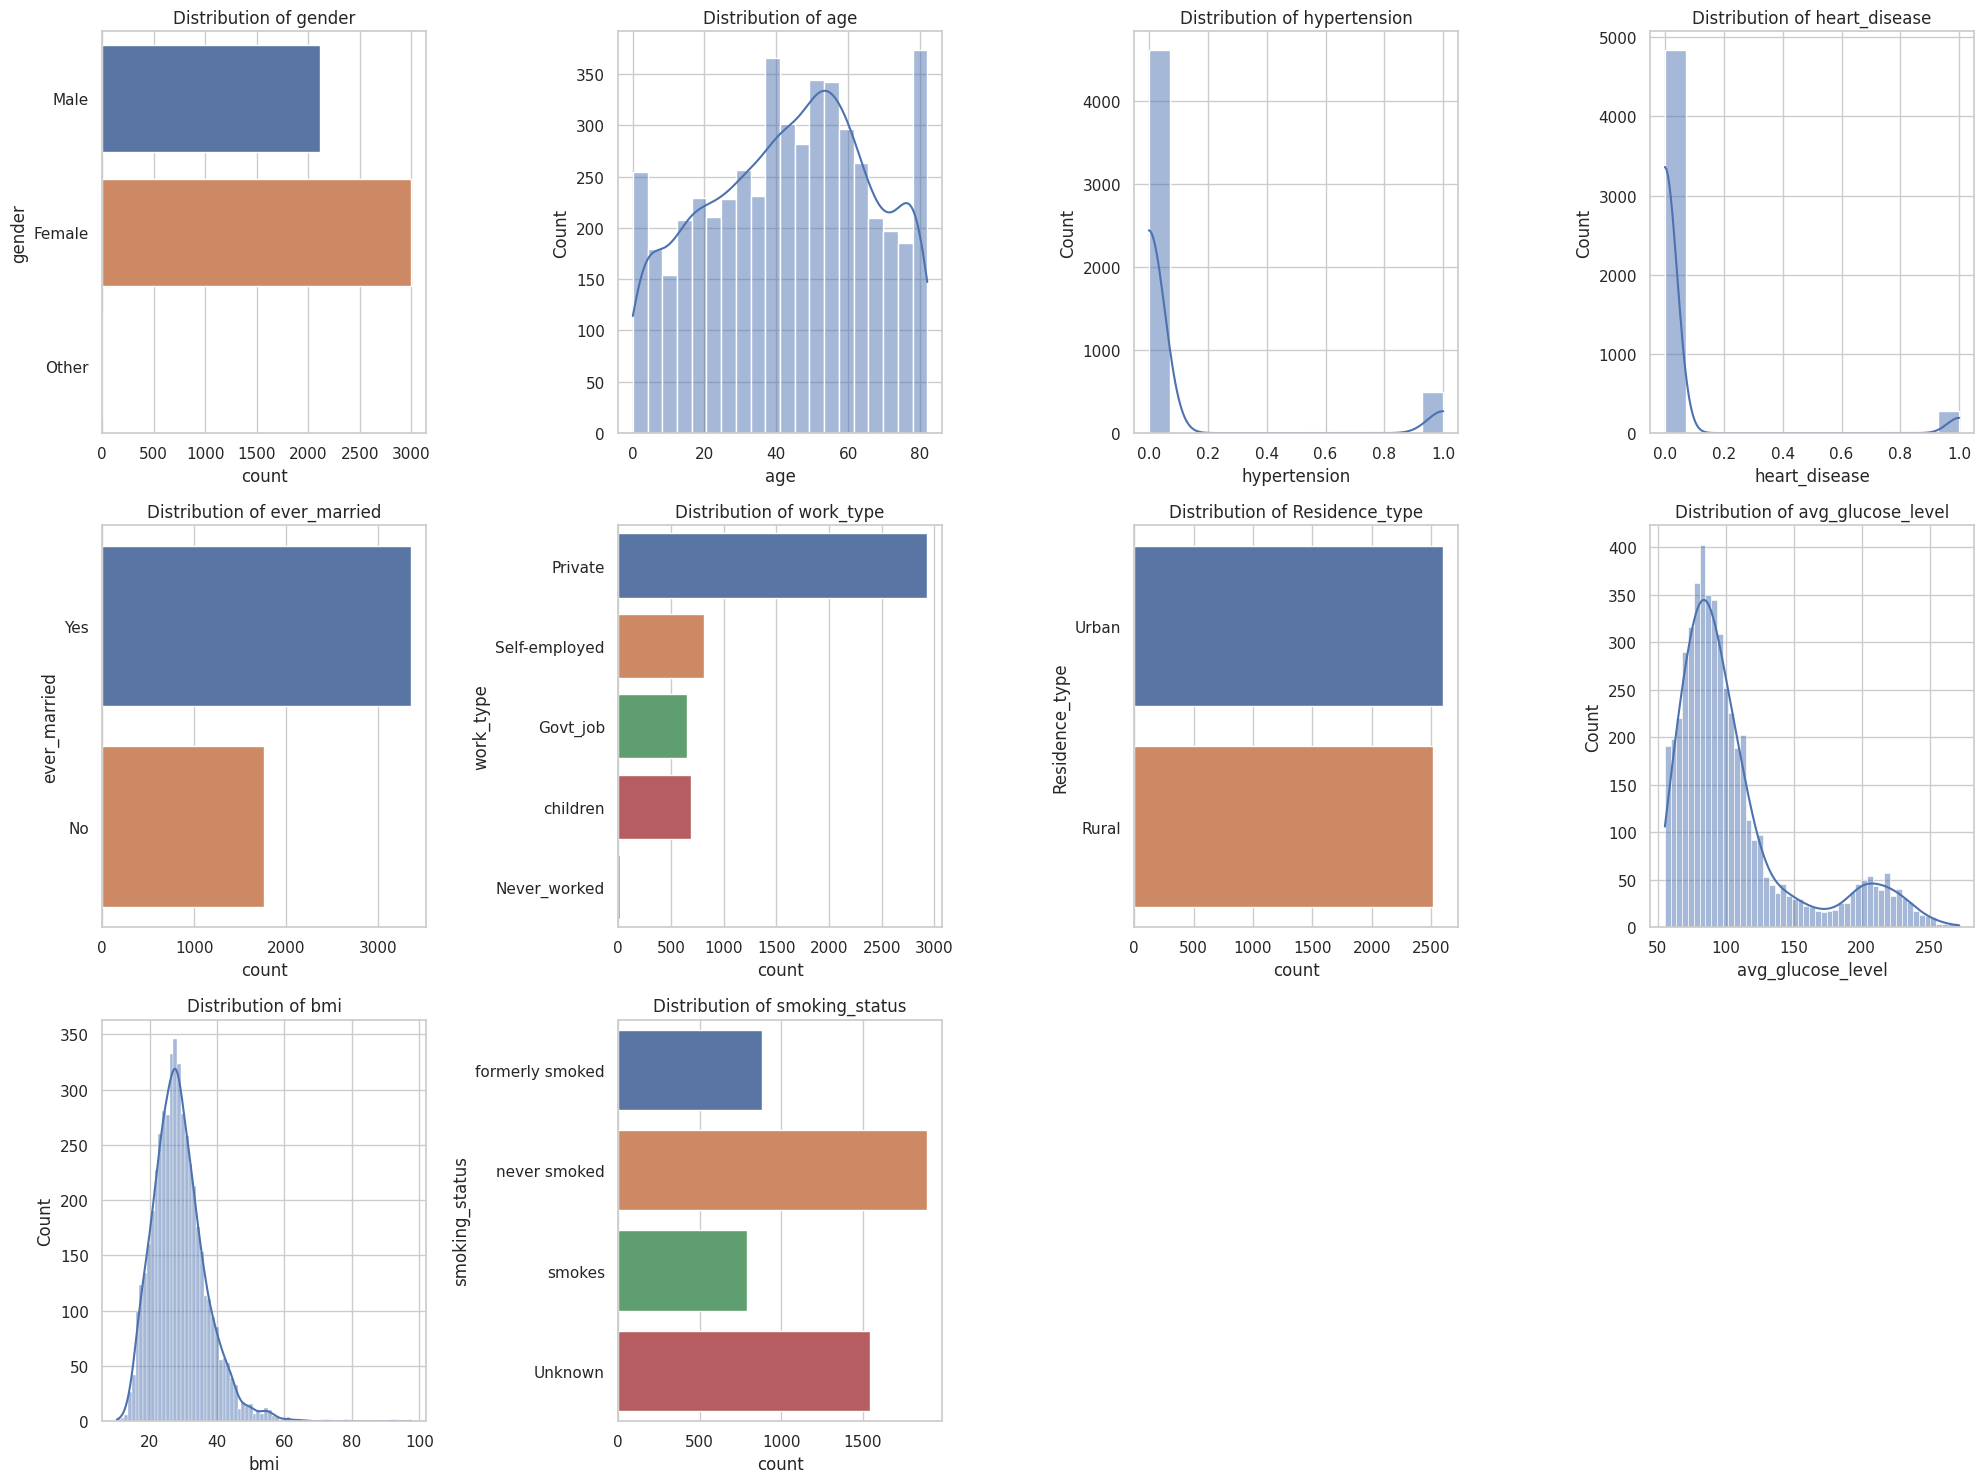

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Plot the distribution of individual features
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    if data[feature].dtype == 'object':
        sns.countplot(y=data[feature])
        plt.title(f'Distribution of {feature}')
    else:
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


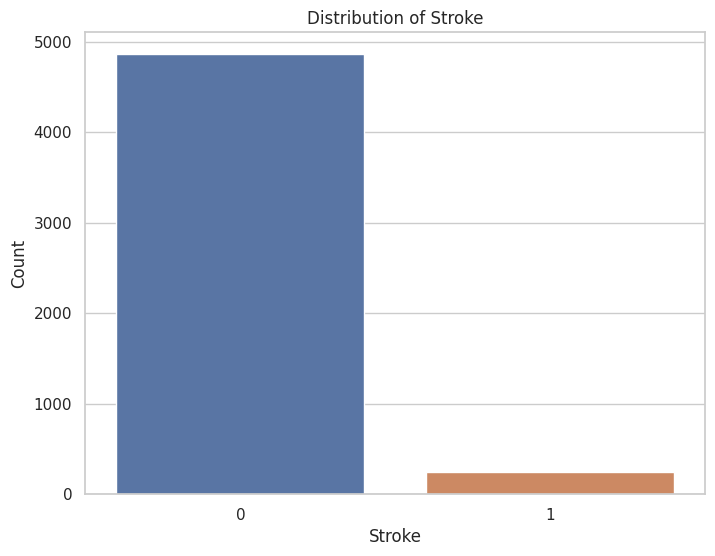

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
# Plot the distribution of the target variable "stroke"
plt.figure(figsize=(8, 6))
sns.countplot(x=data['stroke'])
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Calculate the proportion of each class
class_proportion = data['stroke'].value_counts(normalize=True)
class_proportion


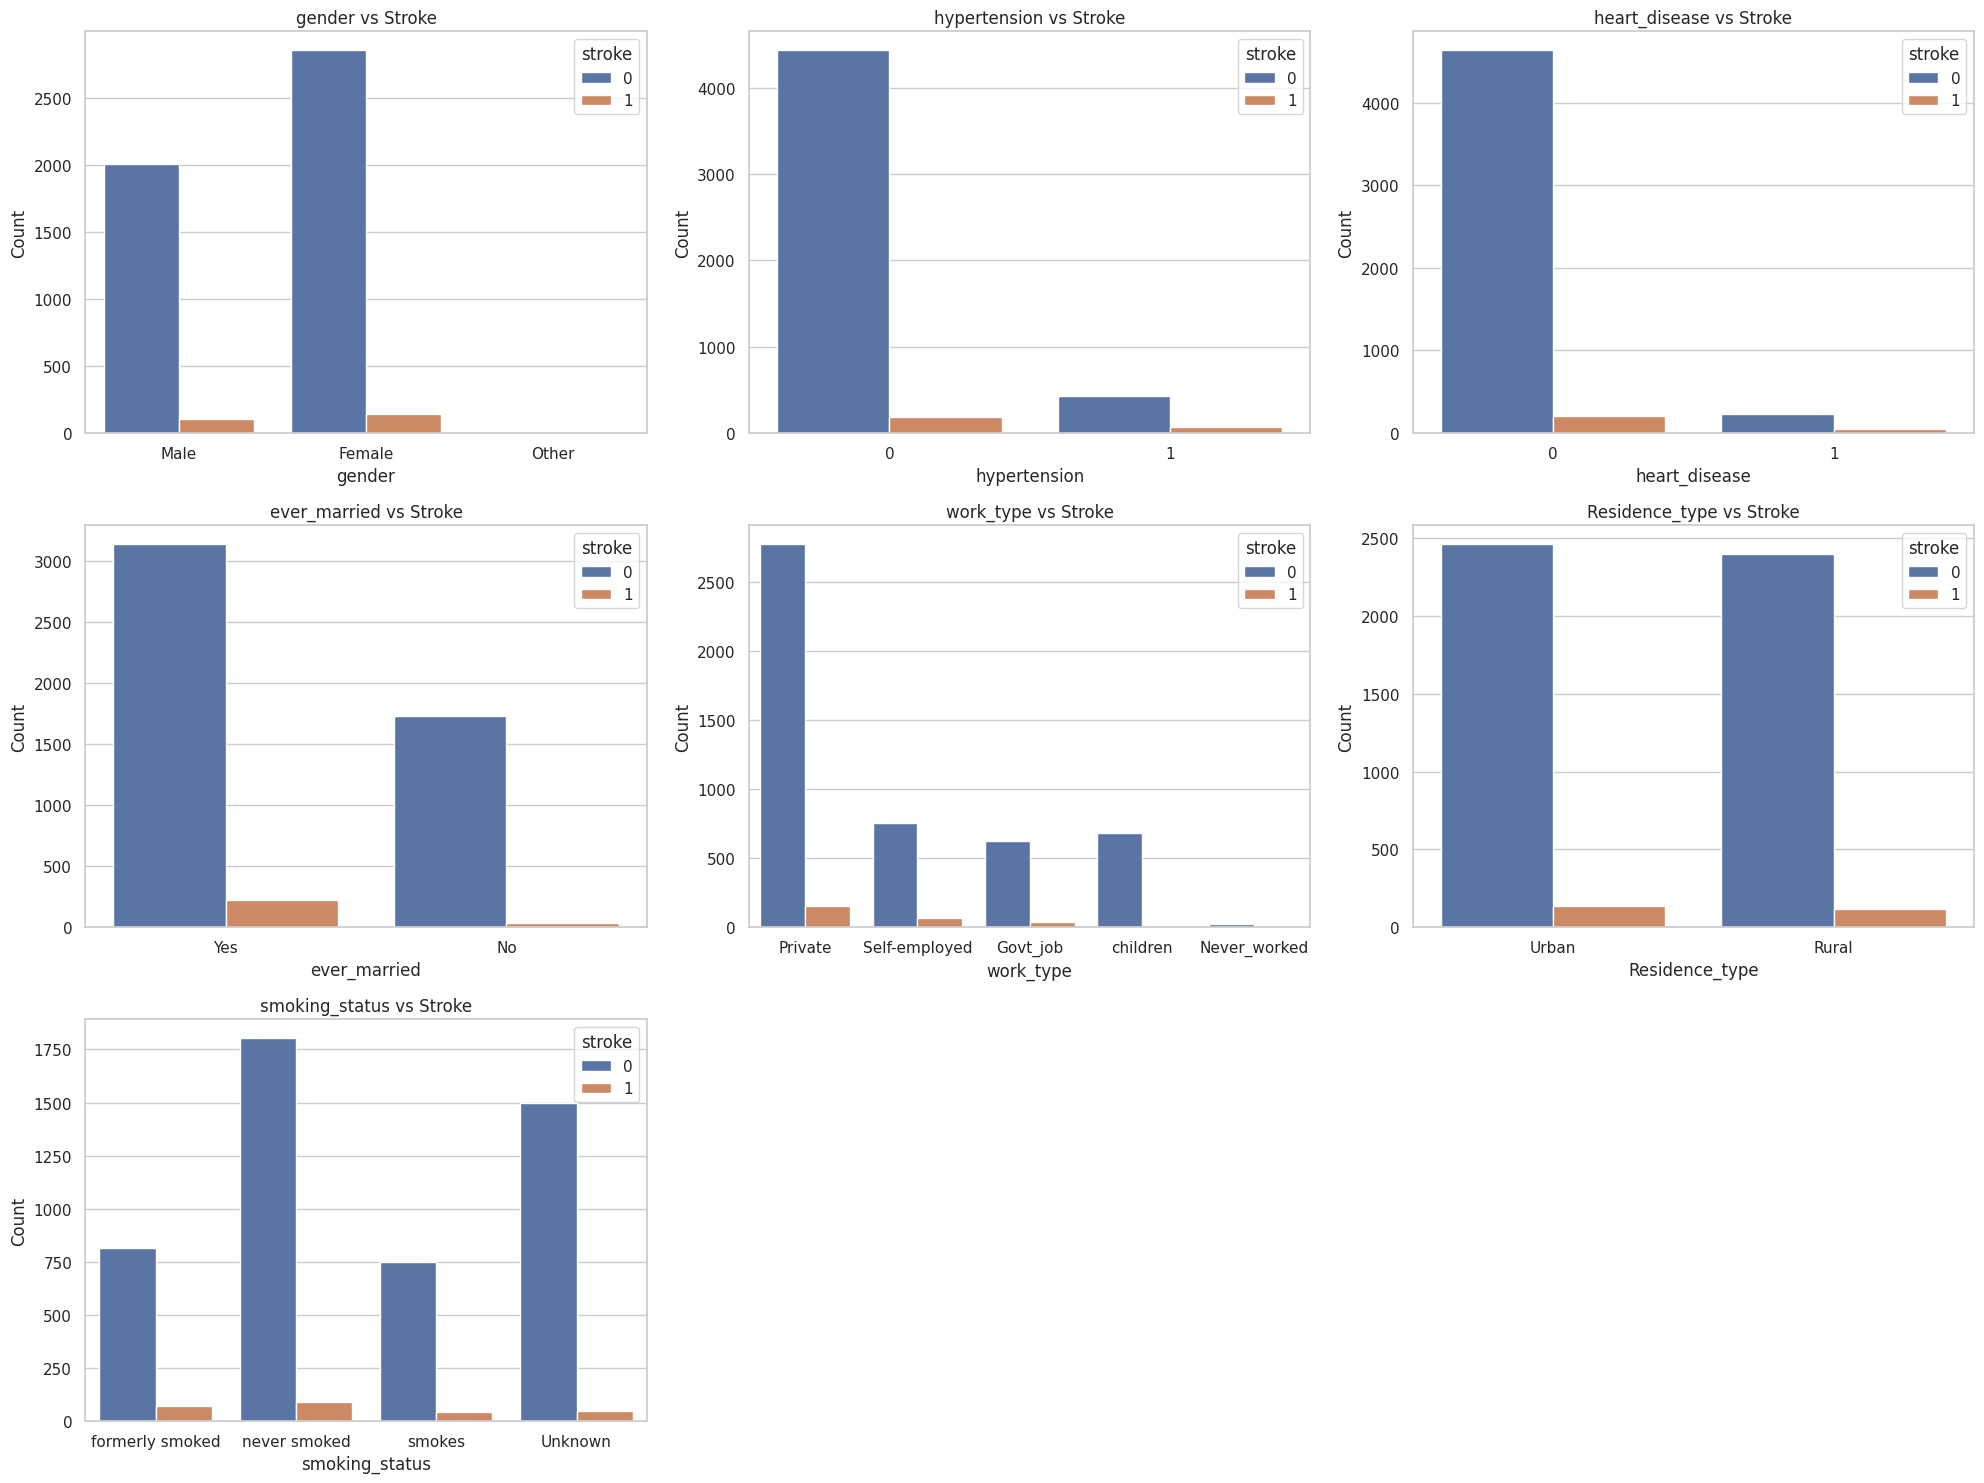

In [ ]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# List of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot the relationship between categorical features and the target variable "stroke"
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[feature], hue=data['stroke'])
    plt.title(f'{feature} vs Stroke')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


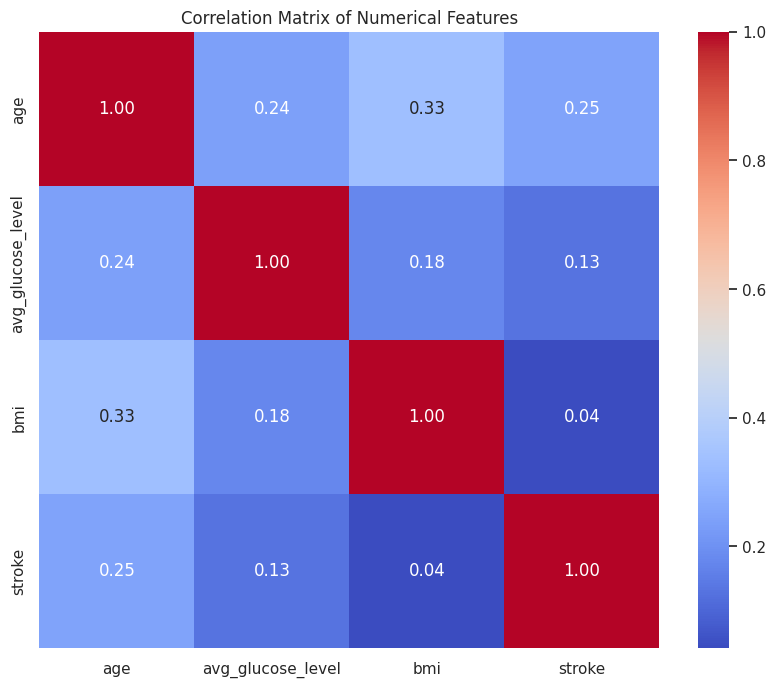

In [ ]:
# List of numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Handling Missing Values

In [ ]:
# Calculate the percentage of missing values in the "bmi" feature
missing_bmi_percentage = data['bmi'].isnull().mean() * 100

# Display the percentage of missing values in "bmi"
missing_bmi_percentage


3.9334637964774952

In [ ]:
# Impute missing values in the "bmi" feature with its median
bmi_median = data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

# Verify if there are any remaining missing values in the dataset
remaining_missing_values = data.isnull().sum().sum()
remaining_missing_values


0

## Handling Outliers

In [ ]:
# List of numerical features for outlier detection
numerical_features_for_outliers = ['age', 'avg_glucose_level', 'bmi']

# Dictionary to store the indices of outliers for each numerical feature
outliers_indices = {}

# Identify outliers using the IQR method
for feature in numerical_features_for_outliers:
    # Calculate Q1 and Q3
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the indices of outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    outliers_indices[feature] = outliers

# Display the number of outliers identified for each numerical feature
outliers_count = {feature: len(indices) for feature, indices in outliers_indices.items()}
outliers_count


{'age': 0, 'avg_glucose_level': 627, 'bmi': 126}

In [ ]:
# Recalculate the number of outliers after capping for each numerical feature
outliers_after_capping_count = {}

for feature in numerical_features_for_outliers:
    # Calculate Q1 and Q3
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the indices of outliers
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)].index
    outliers_after_capping_count[feature] = len(outliers)

outliers_after_capping_count


{'age': 0, 'avg_glucose_level': 627, 'bmi': 126}

In [ ]:
# List of categorical features for encoding
categorical_features_for_encoding = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform One-Hot Encoding for categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features_for_encoding, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features for scaling
numerical_features_for_scaling = ['age', 'avg_glucose_level', 'bmi']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply Standard Scaling to the numerical features
data_encoded[numerical_features_for_scaling] = scaler.fit_transform(data_encoded[numerical_features_for_scaling])

# Display the first few rows of the scaled dataset
data_encoded.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.005086,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.786070,0,0,2.121559,-0.098981,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.626390,0,1,-0.005028,0.472536,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.255342,0,0,1.437358,0.719327,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.582163,1,0,1.501184,-0.631531,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.utils import resample
# Define features (X) and target (y) again
X = data_encoded.drop(columns=['id', 'stroke'])
y = data_encoded['stroke']

# Concatenate the features and target variable to form the dataset
dataset = pd.concat([X, y], axis=1)

# Separate the majority and minority classes
majority_class = dataset[dataset['stroke'] == 0]
minority_class = dataset[dataset['stroke'] == 1]

# Oversample the minority class
minority_class_upsampled = resample(minority_class,
                                    replace=True,
                                    n_samples=len(majority_class),
                                    random_state=42)

# Combine the majority class and the upsampled minority class to form the balanced dataset
balanced_dataset = pd.concat([majority_class, minority_class_upsampled])

# Check the class distribution after oversampling
class_distribution_after_oversampling = balanced_dataset['stroke'].value_counts(normalize=True)
class_distribution_after_oversampling


0    0.5
1    0.5
Name: stroke, dtype: float64

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) from the balanced dataset
X_balanced = balanced_dataset.drop(columns=['stroke'])
y_balanced = balanced_dataset['stroke']

# Split the balanced dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Display the number of samples in the training and testing sets
num_samples_train = len(X_train)
num_samples_test = len(X_test)
num_samples_train, num_samples_test


(7777, 1945)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_logreg = logreg_model.predict(X_test)

# Calculate performance metrics for the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_pred_logreg)
logreg_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)

# Display the performance metrics for the Logistic Regression model
logreg_metrics = {
    'Accuracy': logreg_accuracy,
    'Precision': logreg_precision,
    'Recall': logreg_recall,
    'F1 Score': logreg_f1,
    'ROC-AUC Score': logreg_roc_auc,
    'Confusion Matrix': logreg_confusion_matrix
}
logreg_metrics


{'Accuracy': 0.7897172236503857,
 'Precision': 0.7658168083097262,
 'Recall': 0.8343621399176955,
 'F1 Score': 0.7986213687838504,
 'ROC-AUC Score': 0.7897401655395261,
 'Confusion Matrix': array([[725, 248],
        [161, 811]])}

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate performance metrics for the Decision Tree Classifier model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

# Display the performance metrics for the Decision Tree Classifier model
dt_metrics = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1,
    'ROC-AUC Score': dt_roc_auc,
    'Confusion Matrix': dt_confusion_matrix
}
dt_metrics


{'Accuracy': 0.9784061696658097,
 'Precision': 0.9585798816568047,
 'Recall': 1.0,
 'F1 Score': 0.9788519637462235,
 'ROC-AUC Score': 0.9784172661870504,
 'Confusion Matrix': array([[931,  42],
        [  0, 972]])}

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest Classifier model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Display the performance metrics for the Random Forest Classifier model
rf_metrics = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1,
    'ROC-AUC Score': rf_roc_auc,
    'Confusion Matrix': rf_confusion_matrix
}
rf_metrics


{'Accuracy': 0.990745501285347,
 'Precision': 0.9818181818181818,
 'Recall': 1.0,
 'F1 Score': 0.9908256880733944,
 'ROC-AUC Score': 0.9907502569373072,
 'Confusion Matrix': array([[955,  18],
        [  0, 972]])}

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm_model = SVC(random_state=42)

# Train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_svm = svm_model.predict(X_test)

# Calculate performance metrics for the Support Vector Machine model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_svm)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)

# Display the performance metrics for the Support Vector Machine model
svm_metrics = {
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1 Score': svm_f1,
    'ROC-AUC Score': svm_roc_auc,
    'Confusion Matrix': svm_confusion_matrix
}
svm_metrics


{'Accuracy': 0.8560411311053985,
 'Precision': 0.8061946902654867,
 'Recall': 0.9372427983539094,
 'F1 Score': 0.8667935299714558,
 'ROC-AUC Score': 0.8560828585808601,
 'Confusion Matrix': array([[754, 219],
        [ 61, 911]])}

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier model on the training data
gb_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics for the Gradient Boosting Classifier model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_gb)
gb_confusion_matrix = confusion_matrix(y_test, y_pred_gb)

# Display the performance metrics for the Gradient Boosting Classifier model
gb_metrics = {
    'Accuracy': gb_accuracy,
    'Precision': gb_precision,
    'Recall': gb_recall,
    'F1 Score': gb_f1,
    'ROC-AUC Score': gb_roc_auc,
    'Confusion Matrix': gb_confusion_matrix
}
gb_metrics


{'Accuracy': 0.8611825192802056,
 'Precision': 0.819672131147541,
 'Recall': 0.9259259259259259,
 'F1 Score': 0.8695652173913043,
 'ROC-AUC Score': 0.8612157892733433,
 'Confusion Matrix': array([[775, 198],
        [ 72, 900]])}

## Model Evaluation

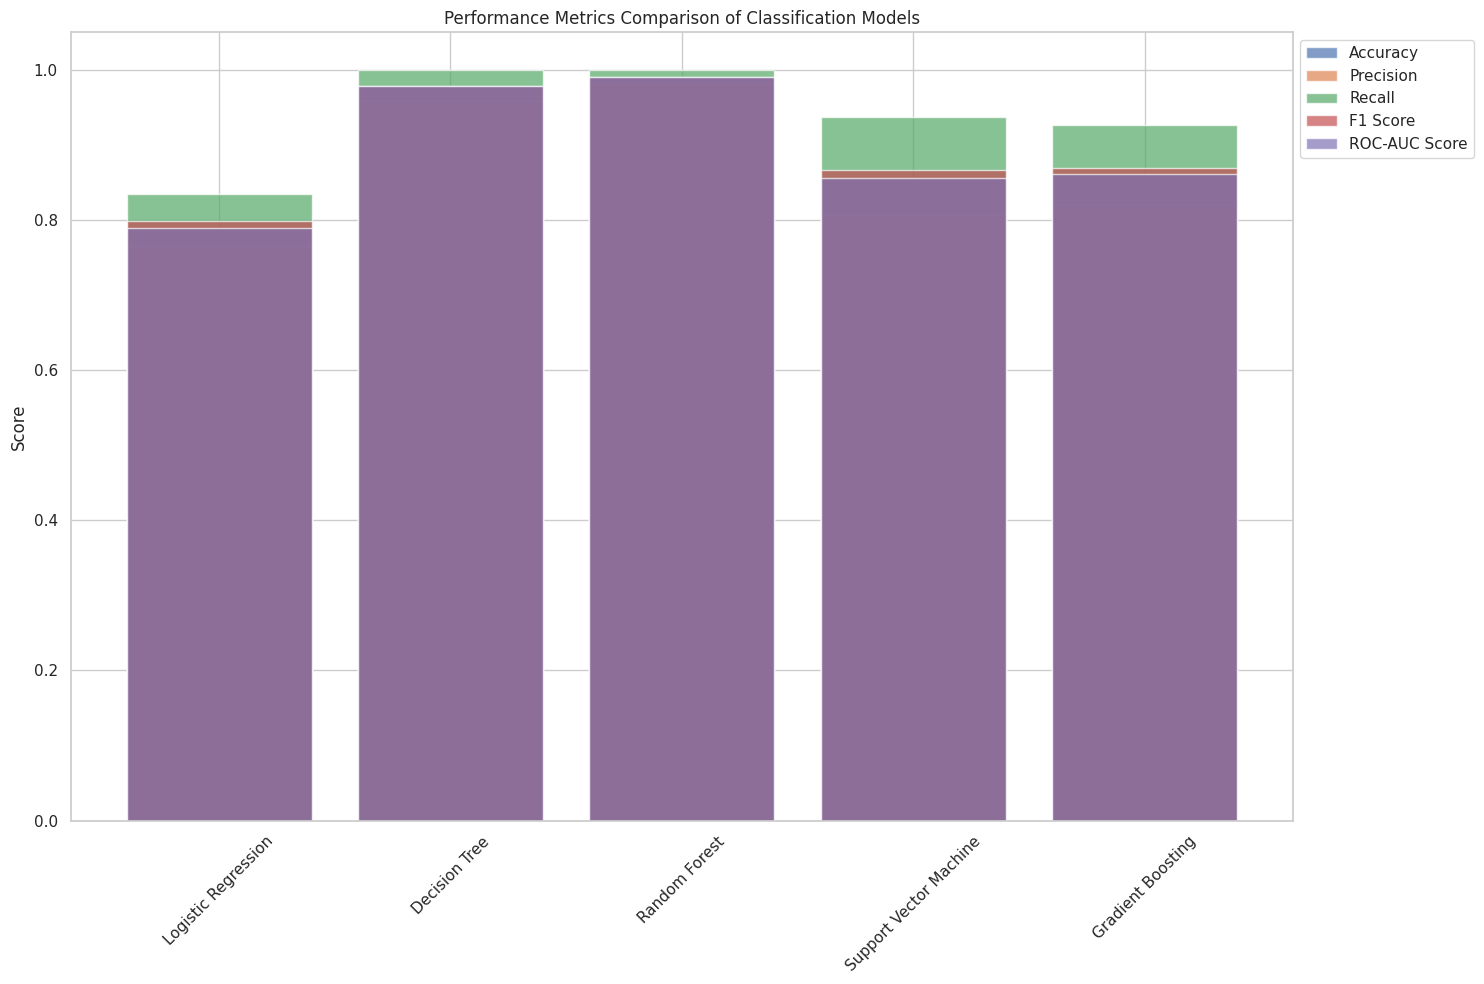

In [ ]:
import matplotlib.pyplot as plt

# Aggregate performance metrics for all models
all_metrics = {
    'Logistic Regression': logreg_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'Support Vector Machine': svm_metrics,
    'Gradient Boosting': gb_metrics
}

# Metrics to be plotted
plot_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score']

# Plot the performance metrics for all models
plt.figure(figsize=(15, 10))

for metric in plot_metrics:
    model_names = list(all_metrics.keys())
    metric_values = [model_metrics[metric] for model_metrics in all_metrics.values()]

    if metric == "Confusion Matrix":
        continue

    plt.bar(model_names, metric_values, alpha=0.7, label=metric)

plt.title("Performance Metrics Comparison of Classification Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame to display the performance metrics of all models in tabular format
metrics_df = pd.DataFrame(all_metrics).T.drop(columns=['Confusion Matrix'])
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC Score
0,Logistic Regression,0.789717,0.765817,0.834362,0.798621,0.78974
1,Decision Tree,0.978406,0.95858,1.0,0.978852,0.978417
2,Random Forest,0.990746,0.981818,1.0,0.990826,0.99075
3,Support Vector Machine,0.856041,0.806195,0.937243,0.866794,0.856083
4,Gradient Boosting,0.861183,0.819672,0.925926,0.869565,0.861216


## Exporting The Model

In [ ]:
import joblib
joblib.dump(rf_model, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']